# ① Import modules

In [1]:
import os
import pandas as pd
import numpy as np
import itertools
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

# ② Set condition to make experimental candidate points

In [2]:
# set condition list
mix1 = [0.1, 0.2, 0.6, 1.0, 1.4, 1.8, 2.2, 2.6, 3.0, 3.4, 3.8, 4.0, 4.4, 4.8, 5.0]
mix2 = [0.1, 0.2, 0.6, 1.0, 1.4, 1.8, 2.2, 2.6, 3.0, 3.4, 3.8, 4.0, 4.4, 4.8, 5.0]
mix3 = [0.1, 0.2, 0.6, 1.0, 1.4, 1.8, 2.2, 2.6, 3.0, 3.4, 3.8, 4.0, 4.4, 4.8, 5.0]
mix4 = [0.1, 0.2, 0.6, 1.0, 1.4, 1.8, 2.2, 2.6, 3.0, 3.4, 3.8, 4.0, 4.4, 4.8, 5.0]
mix5 = [0.1, 0.2, 0.6, 1.0, 1.4, 1.8, 2.2, 2.6, 3.0, 3.4, 3.8, 4.0, 4.4, 4.8, 5.0]

cond = [mix1, mix2, mix3, mix4, mix5]

# ③ Conditions of machine learning

In [3]:
# lock value for train/test split and machine learning
random_state = 12345678      # 12345678                                  # change three or more times for evaluate of machine learning valiance

param_grid_gbdt = {"learning_rate":[i/1000 for i in range(1,502,5)],     # learning rate
                   "max_depth":[2,3,4,5],                                # depth of estimators
                   "n_estimators":[300] ,                                # number of estimators
                   "random_state":[random_state]}                        # random state     

gbdt=GridSearchCV(GradientBoostingRegressor(),param_grid_gbdt,cv=5)

# ④ Import data

In [4]:
data=pd.read_excel("Round2_data.xlsx", sheet_name=0)   #Select regular or time-saving
data

,No.,IgG_product(mg/L)_not_standardized,mix1,mix2,mix3,mix4,mix5
0,1,95.3,0.250,0.250,0.250,0.250,4.000
1,2,85.4,0.250,0.250,0.250,2.125,2.125
2,3,56.0,0.250,0.250,0.250,4.000,0.250
3,4,89.5,0.250,0.250,2.125,0.250,2.125
4,5,66.6,0.250,0.250,2.125,2.125,0.250
5,6,50.5,0.250,0.250,4.000,0.250,0.250
6,7,88.1,0.250,2.125,0.250,0.250,2.125
7,8,76.4,0.250,2.125,0.250,2.125,0.250
8,9,89.5,0.250,2.125,2.125,0.250,0.250
9,10,59.4,0.250,4.000,0.250,0.250,0.250


# ⑤ Set range of explanatory variables ( column name )

In [5]:
features=data.columns[2:]
features

Index(['mix1', 'mix2', 'mix3', 'mix4', 'mix5'], dtype='object')

# ⑥ Execute machine larning (GBDT)

In [6]:
gbdt.fit(data[features],data["IgG_product(mg/L)_not_standardized"])

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.001, 0.006, 0.011, 0.016, 0.021,
                                           0.026, 0.031, 0.036, 0.041, 0.046,
                                           0.051, 0.056, 0.061, 0.066, 0.071,
                                           0.076, 0.081, 0.086, 0.091, 0.096,
                                           0.101, 0.106, 0.111, 0.116, 0.121,
                                           0.126, 0.131, 0.136, 0.141, 0.146, ...],
                         'max_depth': [2, 3, 4, 5], 'n_estimators': [300],
                         'random_state': [12345678]})

In [7]:
best_params = gbdt.best_params_
best_params

{'learning_rate': 0.401,
 'max_depth': 2,
 'n_estimators': 300,
 'random_state': 12345678}

In [ ]:
# save model
save_model_name = r"GBR_model_in_first_cycle.pickle"      

import pickle

pickle.dump(gbdt, open(save_model_name,'wb'))
# Check if it's saved
model = pickle.load(open(save_model_name,'rb'))
model

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.001, 0.006, 0.011, 0.016, 0.021,
                                           0.026, 0.031, 0.036, 0.041, 0.046,
                                           0.051, 0.056, 0.061, 0.066, 0.071,
                                           0.076, 0.081, 0.086, 0.091, 0.096,
                                           0.101, 0.106, 0.111, 0.116, 0.121,
                                           0.126, 0.131, 0.136, 0.141, 0.146, ...],
                         'max_depth': [2, 3, 4, 5], 'n_estimators': [300],
                         'random_state': [12345678]})

In [ ]:
# output predict/measured data
pred_all = pd.concat([data[["No.","IgG_product(mg/L)_not_standardized"]], pd.Series(gbdt.predict(data[features]), name = "pred", index=data.index)], axis=1).sort_index(ascending=True)
pred_all["category"] = "train"
#pred_all.to_clipboard()
pred_all

,No.,IgG_product(mg/L)_not_standardized,pred,category
0,1,95.3,95.299999,train
1,2,85.4,85.400002,train
2,3,56.0,56.000000,train
3,4,89.5,89.500008,train
4,5,66.6,66.599995,train
5,6,50.5,50.500000,train
6,7,88.1,88.100001,train
7,8,76.4,76.399997,train
8,9,89.5,89.499997,train
9,10,59.4,59.400001,train


In [9]:
# evaluation of machine learning model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  

# calculate R2, R
train_r2     = r2_score(pred_all["IgG_product(mg/L)_not_standardized"], pred_all["pred"])
train_r      = np.corrcoef(pred_all["IgG_product(mg/L)_not_standardized"], pred_all["pred"])[0,1]


print('R2 and R\n')
print('train  \t\tR2, R = ', f'{train_r2:.3f}',"\t",f'{train_r:.3f}')
print('\n')

# calculate MAE
MAE_train = mean_absolute_error(pred_all["IgG_product(mg/L)_not_standardized"], pred_all["pred"])
print(f'pridict / measured MAE\n')

print(f' MAE train  =','\t ',f'{MAE_train:.3f}')

R2 and R

train  		R2, R =  1.000 	 1.000


pridict / measured MAE

 MAE train  = 	  0.000


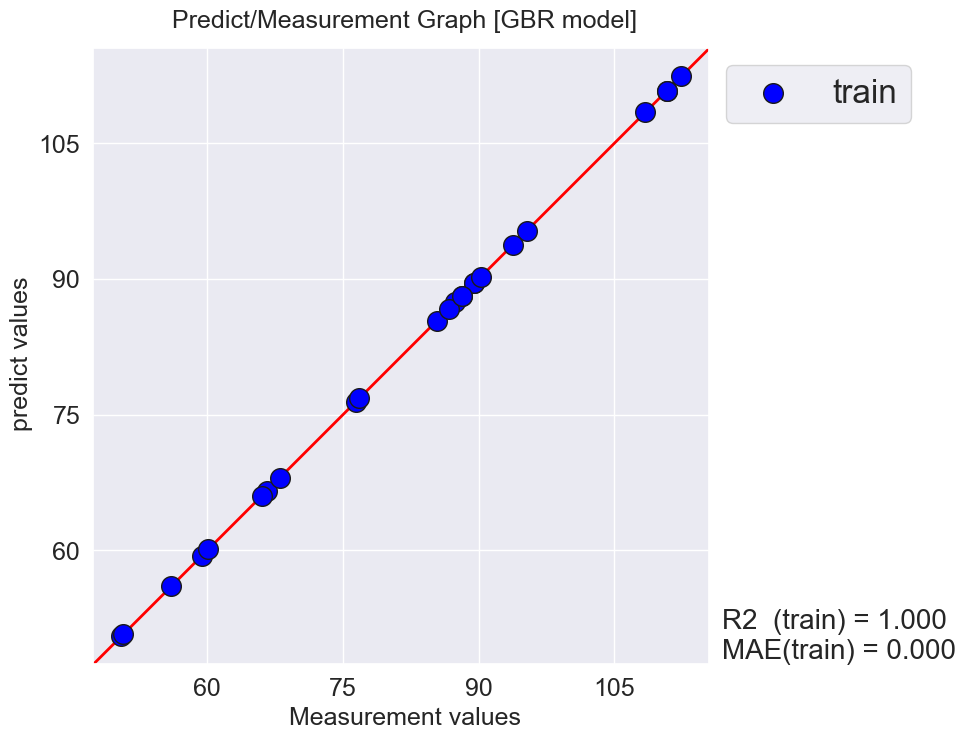

In [10]:
# make predict/measure plot

# import modules
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns; sns.set()            
#plt.rcParams['font.family'] = 'Yu Gothic'   

# set max and min values 
lower =  np.nanmin(np.concatenate([pred_all["IgG_product(mg/L)_not_standardized"].values,  pred_all["pred"].values]))
upper =  np.nanmax(np.concatenate([pred_all["IgG_product(mg/L)_not_standardized"].values,  pred_all["pred"].values]))
center = 0.5*(lower+upper) ; length = 0.5*(upper-lower)
lower = center - 1.1*length ; upper = center + 1.1*length
glist = [lower,upper]

# set condtions of graph
fig = plt.figure(figsize=(8,8))                          
ax = fig.add_subplot(1 ,1, 1)                              
plt.rcParams['font.size'] = 18                                       
plt.xlim(glist) ; plt.ylim(glist)                                
# set axis
plt.title(f' Predict/Measurement Graph [GBR model]',       
          fontsize=18, pad = 15)                                
plt.xlabel(f' Measurement values',fontsize=18)                 
plt.ylabel(f' predict values',fontsize=18)                    
plt.tick_params(labelsize=18)                                          
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(6))                   
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(6))                  

# plot train data
plt.scatter(pred_all["IgG_product(mg/L)_not_standardized"], pred_all["pred"], label='train', color ='blue', ec='k', s=200, marker='o', zorder =2)
# plot diagonal
x1 = np.linspace(lower, upper) ; y1 = x1              
plt.plot(x1,y1,color='red',linewidth=2, zorder =1)    

# set legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left',fontsize=24)
# set evaluation value
ax.text(1.02, 0, f'R2  (train) = {(train_r2):.3f}\nMAE(train) = {(MAE_train):.3f}',
        fontsize=20, va='bottom', transform=ax.transAxes, rotation=0)
ax.set_aspect('equal', adjustable='box')
#ax.axis([upper,lower,upper,lower])
plt.show()

# ⑦ Creation of experimental candidate points

In [11]:
artificial_data=list(itertools.product(mix1, mix2, mix3, mix4, mix5))
artificial_data=pd.DataFrame(artificial_data, columns=["mix1", "mix2", "mix3", "mix4", "mix5"])
#artificial_data.to_clipboard()
artificial_data

,mix1,mix2,mix3,mix4,mix5
0,0.1,0.1,0.1,0.1,0.1
1,0.1,0.1,0.1,0.1,0.2
2,0.1,0.1,0.1,0.1,0.6
3,0.1,0.1,0.1,0.1,1.0
4,0.1,0.1,0.1,0.1,1.4
...,...,...,...,...,...
759370,5.0,5.0,5.0,5.0,3.8
759371,5.0,5.0,5.0,5.0,4.0
759372,5.0,5.0,5.0,5.0,4.4
759373,5.0,5.0,5.0,5.0,4.8


# ⑧ Predict experimental candidate points

In [12]:
artificial_data["predicted"]=gbdt.predict(artificial_data)

In [13]:
# pick-up top 25 sumples
sort=artificial_data.sort_values("predicted", ascending=False)
results=sort[0:26].copy()
#results.to_clipboard()

# ⑨ Output experimental candidate points

In [ ]:
results.to_csv("predicted_by_GBR_1st_cycle.csv")